In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from sklearn import datasets

from collections import Counter


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Loading the Iris Dataset

In [3]:
iris = datasets.load_iris()
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

## Building and Running DBSCAN Model
DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)

In [4]:
model = DBSCAN(eps = 0.8, min_samples = 19).fit(iris.data)
print model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


In [5]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Visualize Results

In [6]:
print Counter(model.labels_) #How many datapoints are assigned to each labels

Counter({1: 94, 0: 50, -1: 6})


In [7]:
outliers = pd.DataFrame(iris.data[model.labels_==-1])
outliers.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
outliers

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,2.5,3.0,1.1
1,7.6,3.0,6.6,2.1
2,7.7,3.8,6.7,2.2
3,7.7,2.6,6.9,2.3
4,7.7,2.8,6.7,2.0
5,7.9,3.8,6.4,2.0


Text(0.5,1,'DBSCAN for Outliers Detection')

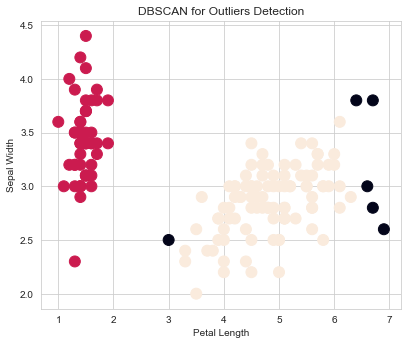

In [8]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(iris.data[:,2], iris.data[:,1], c=colors, s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

plt.title('DBSCAN for Outliers Detection')


Text(0.5,1,'Outliers')

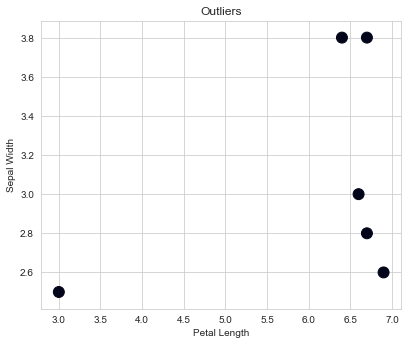

In [9]:
# Print out only the outhlier

out_fig = plt.figure()

out_ax = out_fig.add_axes([.1,.1,1,1])

X = outliers.iloc[:,2].values
Y = outliers.iloc[:,1].values

out_ax.scatter(X, Y, c=[-1,-1,-1,-1,-1,-1], s=120)

out_ax.set_xlabel('Petal Length')
out_ax.set_ylabel('Sepal Width')

plt.title('Outliers')